In [13]:
import pandas as pd
data = pd.read_csv("ettarraData.csv")
data.head()


,Date,Timestamp,Invoice No.,Payment Type,Order Type,Area,Item Name,Price,Qty.,Sub Total,...,Address,GST,Assign To,Non Taxable,SGST Rate,SGST Amount,CGST Rate,CGST Amount,Service Charge Rate,Service Charge Amount
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1,285.71,...,NaN,NaN,NaN,0.0,2.5,3.52,2.5,3.52,10,14.07
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1,214.29,...,NaN,NaN,NaN,0.0,2.5,5.36,2.5,5.36,10,21.43
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1,85.71,...,NaN,NaN,NaN,0.0,2.5,2.14,2.5,2.14,10,8.57
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1,66.67,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,1.67,2.5,1.67,10,6.67
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1,285.71,...,NaN,NaN,Allahbaksh Shaikh,0.0,2.5,7.14,2.5,7.14,10,28.57


In [14]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   6075 non-null   object 
 1   Timestamp              6075 non-null   object 
 2   Invoice No.            6075 non-null   object 
 3   Payment Type           6075 non-null   object 
 4   Order Type             6075 non-null   object 
 5   Area                   4737 non-null   object 
 6   Item Name              6075 non-null   object 
 7   Price                  6075 non-null   float64
 8   Qty.                   6075 non-null   int64  
 9   Sub Total              6075 non-null   float64
 10  Discount               6075 non-null   float64
 11  Tax                    6075 non-null   float64
 12  Final Total            6075 non-null   float64
 13  Status                 6075 non-null   object 
 14  Table No.              4264 non-null   object 
 15  Serv

In [15]:

missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)



Missing values:
 Date                        0
Timestamp                   0
Invoice No.                 0
Payment Type                0
Order Type                  0
Area                     1338
Item Name                   0
Price                       0
Qty.                        0
Sub Total                   0
Discount                    0
Tax                         0
Final Total                 0
Status                      0
Table No.                1811
Server Name                 0
Covers                      0
Variation                1167
Category                    0
HSN                      6075
Phone                    3418
Name                     2928
Address                  5115
GST                      6075
Assign To                4083
Non Taxable                 0
SGST Rate                   0
SGST Amount                 0
CGST Rate                   0
CGST Amount                 0
Service Charge Rate         0
Service Charge Amount       0
dtype: int64


In [16]:
data.drop_duplicates(inplace=True)

data['Date'] = pd.to_datetime(data['Date'])
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [17]:

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

data.head()


,Date,Timestamp,Invoice No.,Payment Type,Order Type,Area,Item Name,Price,Qty.,Sub Total,...,Non Taxable,SGST Rate,SGST Amount,CGST Rate,CGST Amount,Service Charge Rate,Service Charge Amount,Year,Month,DayOfWeek
0,2024-01-28,2024-01-29 02:25:22,21573,Cash,Dine In,Dining,ORANGE JUICE,285.71,1,285.71,...,0.0,2.5,3.52,2.5,3.52,10,14.07,2024,1,6
1,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,Iced Latte (350 ML),214.29,1,214.29,...,0.0,2.5,5.36,2.5,5.36,10,21.43,2024,1,6
2,2024-01-28,2024-01-29 02:17:11,21572,CARD,Dine In,Dining,ALMOND MILK (200 ML),85.71,1,85.71,...,0.0,2.5,2.14,2.5,2.14,10,8.57,2024,1,6
3,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Chicken Calzone,66.67,1,66.67,...,0.0,2.5,1.67,2.5,1.67,10,6.67,2024,1,6
4,2024-01-28,2024-01-29 02:11:30,21571,CARD,Dine In,Dining,Coconut Nankhatai (with Egg),285.71,1,285.71,...,0.0,2.5,7.14,2.5,7.14,10,28.57,2024,1,6


In [20]:
features = ['Qty.']

X = data[features]
y = data['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

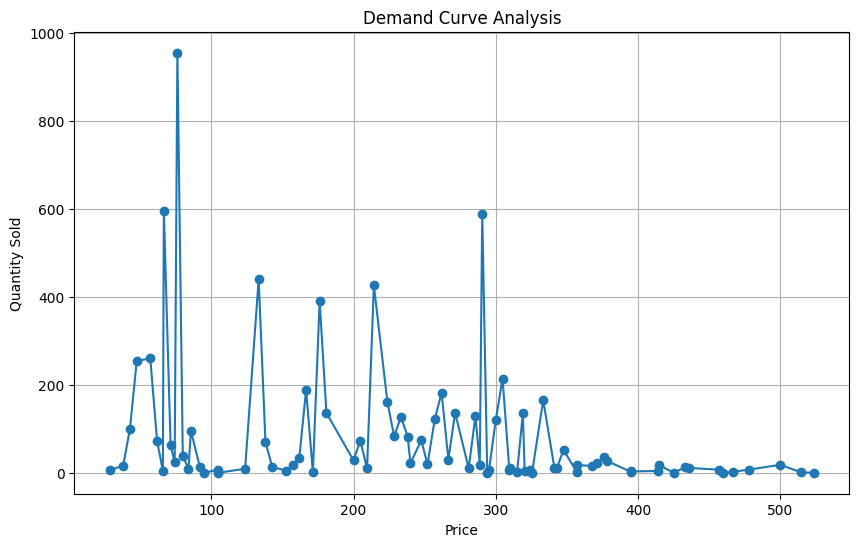

In [22]:
import matplotlib.pyplot as plt

demand_data = data.groupby('Price')['Qty.'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(demand_data['Price'], demand_data['Qty.'], marker='o', linestyle='-')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.title('Demand Curve Analysis')
plt.grid(True)
plt.show()
